In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The problem setup ##

Consider a 2D electrostatics problem that we looked at in class: $\nabla^2\Phi=0$ in polar coordinates with $\Phi=0$ at $\theta=0$ and $\theta=\beta$ and $\Phi(r=R,\theta)=V(\theta)$ specified.  In polar coordinates
$$
  \frac{1}{r}\frac{d}{dr}\left(r\frac{d}{dr} \Phi\right) + \frac{1}{r^2}\frac{d^2\Phi}{d\theta^2} = 0
$$
We try separation of variables and find the solution is power-laws times trig functions.  The boundary conditions remove the negative powers of $r$ and the cosine.  Thus
$$
  \Phi(r,\theta) = \sum_{m=1}^\infty a_m r^{\nu_m}\sin\nu_m\theta
  \quad , \quad \nu_m\equiv\frac{m\pi}{\beta}
$$
In class we didn't specify $a_m$, but here we will solve for it using a boundary condition at $r=R$, i.e. $V(\theta)$.  Let's choose units where $R=1$ to simplify our lives and imagine
$$
  V(\theta) = \left\{ \begin{array}{cc} \theta/\beta & 0\le\theta\le\beta/2 \\
  1-\theta/\beta & \beta/2\le\theta\le\beta \end{array}\right.
$$
A little notation helps.  Let $x=\theta/\beta$, so our function is $x$ up to $x=1/2$ and $1-x$ between $x=1/2$ and $x=1$.  Similarly our series expansion at $r=1$ is
$$
  V(x) = \sum_{n=1}^\infty a_n \sin n\pi x \quad\Rightarrow\quad
  a_n  = 2\int_0^1 dx\ V(x)\sin n\pi x
       = \frac{4\sin(n\pi/2)-2\sin(n\pi)}{n^2\pi^2}
$$
where in the last step we have written easier to code versions of $(-1)^{(n-1)/2}$ with even and odd $n$ selection.

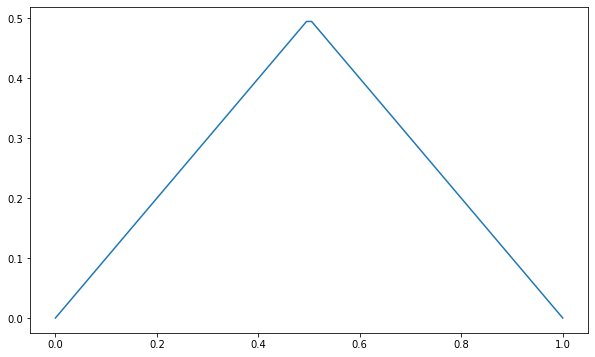

In [2]:
Nmax = 500
nn   = np.arange( Nmax )
An   = (4*np.sin(nn*np.pi/2)-2*np.sin(nn*np.pi))/(nn**2*np.pi**2 + 1e-30)
xx   = np.linspace(0,1,100)
VV   = [np.sum(An*np.sin(nn*np.pi*x)) for x in xx]
# Put in a sanity check.
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(xx,VV)

Now let's make a plot of the solution in the domain $0\le r\le 1$ and $0\le\theta\le\beta$.

Phi in range  -3.8270584133032864e-18 0.4909517145252114


Text(0, 0.5, '$\\theta/\\beta$')

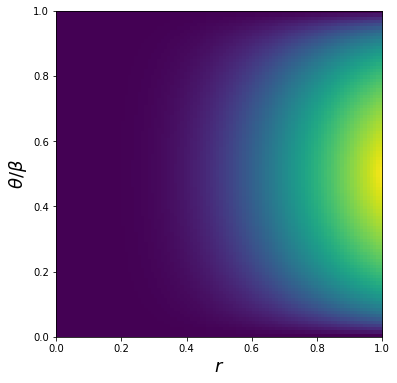

In [14]:
def Phi(r,theta,beta,Nmax):
    """Does the sum to give Phi."""
    nn = np.arange( Nmax )
    nu = nn*np.pi/beta
    An = (4*np.sin(nn*np.pi/2)-2*np.sin(nn*np.pi))/(nn**2*np.pi**2 + 1e-30)
    pp = np.sum( An*r**nu*np.sin(nu*theta))
    return(pp)
# We'll do this here by brute force for readability... check out one way
# using numpy's "einsum" function below.
beta  = np.pi/4
rr,tt = np.meshgrid(np.linspace(0,1,100),np.linspace(0,beta,100),indexing='ij')
PhiV  = np.zeros_like(rr)
for ix in range(PhiV.shape[0]):
    for iy in range(PhiV.shape[1]):
        PhiV[ix,iy] = Phi(rr[ix,iy],tt[ix,iy],beta,25)
print("Phi in range ",np.min(PhiV),np.max(PhiV))
# Make a color figure of Phi.
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.imshow(np.arcsinh(20*PhiV.T),extent=[0,1,0,1],vmin=0,vmax=3)
ax.set_xlabel(r'$r$',fontsize=18)
ax.set_ylabel(r'$\theta/\beta$',fontsize=18)

For completeness sake, here's a less readable but more Pythonic way of doing this:
```python
rr  = np.linspace(0, 1, 100)
tt  = np.linspace(0, beta, 100)
nu  = nn*np.pi/beta
An  = (4*np.sin(nn*np.pi/2)-2*np.sin(nn*np.pi))/(nn**2*np.pi**2+1e-30)
PhiV= np.einsum('i,ji,ki->jk',An,rr[:,None]**nu[None,:],np.sin(tt[:,None]*nu[None,:]))
```

Nmax= 2, Phi=0.09757507
Nmax= 5, Phi=0.09463198
Nmax=10, Phi=0.09464624
Nmax=25, Phi=0.09464615
Nmax=50, Phi=0.09464615


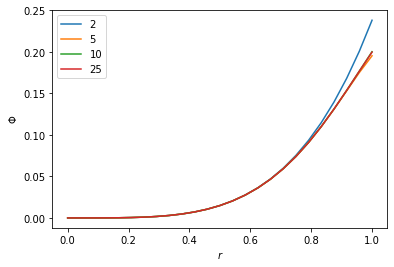

In [20]:
# Let's look at the convergence vs. the number of terms.
# Pick a "random" theta = 0.2*beta and plot Phi vs. r for
# various Nmax.
beta  = np.pi/4
rr,tt = np.linspace(0,1,25),0.2*beta
PhiV  = np.zeros_like(rr)
#
fig,ax= plt.subplots(1,1,figsize=(6,4))
for Nmax in [2,5,10,25]:
    for ix in range(PhiV.shape[0]):
        PhiV[ix] = Phi(rr[ix],tt,beta,Nmax)
    ax.plot(rr,PhiV,label=str(Nmax))
ax.legend()
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$\Phi$')
#
for Nmax in [2,5,10,25,50]:
    print("Nmax={:2d}, Phi={:10.8f}".format(Nmax,Phi(0.8,tt,beta,Nmax)))

So the sum converges super quickly, even at reasonably large values of $r$ (where the convergence is the "slowest").

What other ways can you think of to solve this particular problem?
Finite difference?  Variational methods?  Multigrid relaxation?  Finite elements?